# PUBG Exploratory Data Analysis

![pubg](https://user-images.githubusercontent.com/13174586/48706353-01eaac00-ec22-11e8-9800-5bd0f645ad9f.jpg)

### Import required libraries

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random

### Import data

In [6]:
data= pd.read_csv("train_V2.csv")

In [7]:
#EXPLORATORY DATA ANALYSIS

data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
#Details of the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [9]:
data["groupId"].value_counts()
data["matchId"].value_counts()

ac1492b9605500    100
66c8b8e9a292f4    100
82ca350ce24e1f    100
161b4d48321317    100
894a46e7be87b1    100
2895764b371d05    100
3ca92d4e1dd2fd    100
c9eb9414629c99    100
76aa25fd12e1af    100
fe1be8e33af055    100
76665f80036fb3    100
37da0515d8b788    100
d0acdf3a32345e    100
9fad5a46499c8c    100
d3cdeefb39e0f5    100
8fe0aeb350308a    100
9d289e940f0406    100
0b7c11bb9dd3a5    100
ef1e1e4a1f966c    100
215688565abc3a    100
c98a2a5cb4d5c4    100
455f9e9501bf2a    100
f46fdd664f9c71    100
67397e5c90e9d0    100
9584f8632c92db    100
31eda9a784dd45    100
8d2d9879fba104    100
dedd9bdc503d3d    100
51b68a308313f9    100
855cfde037d4ef    100
                 ... 
45d595cfe121bd      8
cf214bd1cc1dda      8
ce4a6dc88c487c      8
a97f4f50bd636b      8
9e7dcc7b9a5162      8
b854116387dfbd      8
a46b1598692634      8
9b5eba3473e5f0      8
8b696c934c5cfc      8
c1217e571d7932      8
e263f4a227313a      8
378847703cc63b      8
3270384443bd32      7
23c3819550f61f      7
7c785a64ec

In [10]:
#Dimension of the data
data.shape

(4446966, 29)

##### Check if the matchID and Group ID has any correlation with the Win Place % as people might get into an easy lobby or 
##### might be grouped with a ***good*** Squad or in Duo

In [11]:
df=pd.DataFrame()
df[["groupId","matchId", "winPlacePerc"]]= pd.DataFrame(data[["groupId","matchId", "winPlacePerc"]].copy())

#Converting strings to categorical codes
df["groupId"]= df["groupId"].astype('category').cat.codes
df["matchId"]= df["matchId"].astype('category').cat.codes
df["winPlacePerc"]= df["winPlacePerc"].astype('category').cat.codes

#Check Correlation
df.corr()

#The correlation matrix does not show any relation

,groupId,matchId,winPlacePerc
groupId,1.000000,0.000056,0.000408
matchId,0.000056,1.000000,0.000180
winPlacePerc,0.000408,0.000180,1.000000


In [12]:
list(data.columns.values)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

#### Dropping "Id", "groupId", "matchId" from the dataframe

In [13]:
data=data.drop(data[["Id", "groupId", "matchId"]], axis=1)
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'], dtype=object)

In [14]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Check the correlation matrix

In [15]:
cor= data.corr()
cor.style.background_gradient().set_precision(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1,0.31,0.41,0.3,0.2,0.23,-0.29,0.039,0.32,0.24,0.26,-0.019,-0.15,-0.15,-0.016,0.2,0.11,0.012,0.023,0.0061,0.058,0.29,0.24,0.024,0.3
boosts,0.31,1,0.52,0.36,0.33,0.54,-0.55,0.0083,0.5,0.41,0.42,0.072,-0.014,-0.013,0.023,0.25,0.33,0.035,0.11,0.013,0.087,0.64,0.41,-0.0076,0.63
damageDealt,0.41,0.52,1,0.74,0.61,0.34,-0.68,0.05,0.89,0.7,0.56,-0.0068,-0.041,-0.04,-0.0015,0.26,0.14,0.052,0.037,0.015,0.081,0.4,0.35,0.018,0.44
DBNOs,0.3,0.36,0.74,1,0.47,0.27,-0.56,0.043,0.71,0.65,0.45,-0.014,-0.27,-0.27,-0.0035,0.3,0.1,0.036,0.017,0.069,0.06,0.28,0.22,0.011,0.28
headshotKills,0.2,0.33,0.61,0.47,1,0.2,-0.47,0.024,0.67,0.51,0.45,-0.018,0.0092,0.0094,0.0051,0.15,0.076,0.013,0.029,0.0087,0.039,0.25,0.22,0.005,0.28
heals,0.23,0.54,0.34,0.27,0.2,1,-0.39,-0.0026,0.31,0.27,0.26,0.11,-0.065,-0.064,0.019,0.24,0.3,0.025,0.08,0.035,0.063,0.43,0.31,-0.011,0.43
killPlace,-0.29,-0.55,-0.68,-0.56,-0.47,-0.39,1,-0.023,-0.73,-0.81,-0.54,-0.0058,0.017,0.019,-0.015,-0.27,-0.24,-0.057,-0.089,-0.038,-0.074,-0.59,-0.49,-0.0024,-0.72
killPoints,0.039,0.0083,0.05,0.043,0.024,-0.0026,-0.023,1,0.036,0.037,0.014,-0.1,-0.045,-0.042,-0.98,0.012,-0.029,-0.0042,-0.0046,-0.04,-0.0097,0.0046,-0.004,0.98,0.013
kills,0.32,0.5,0.89,0.71,0.67,0.31,-0.73,0.036,1,0.8,0.6,-0.031,-0.0048,-0.0041,0.0082,0.25,0.11,0.064,0.039,0.018,0.08,0.37,0.34,0.0069,0.42
killStreaks,0.24,0.41,0.7,0.65,0.51,0.27,-0.81,0.037,0.8,1,0.52,-0.035,-0.037,-0.036,0.0034,0.24,0.098,0.066,0.035,0.028,0.064,0.33,0.28,0.0086,0.38


### Creating Buckets for the players based on **WinPlacePerc** variable
#### Quartile 1 - Top 25% of the Players - 75-100 %ile
#### Quartile 2 - 50-75 %ile
#### Quartile 3 - 25-50 %ile
#### Quartile 4 - 0-25 %ile - Noobs :-P

In [12]:
data['WinPlaceBucket'] = np.where(data.winPlacePerc >0.75, 'Quartile1', 
                          np.where(data.winPlacePerc>.5, 'Quartile2', 
                                   np.where(data.winPlacePerc>.25, 'Quartile3', 'Quartile4')))
data[["winPlacePerc","WinPlaceBucket"]]

,winPlacePerc,WinPlaceBucket
0,0.4444,Quartile3
1,0.6400,Quartile2
2,0.7755,Quartile1
3,0.1667,Quartile4
4,0.1875,Quartile4
5,0.0370,Quartile4
6,0.0000,Quartile4
7,0.7368,Quartile2
8,0.3704,Quartile3
9,0.2143,Quartile4


### Scatter Plot of all the variables to see their relationships

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


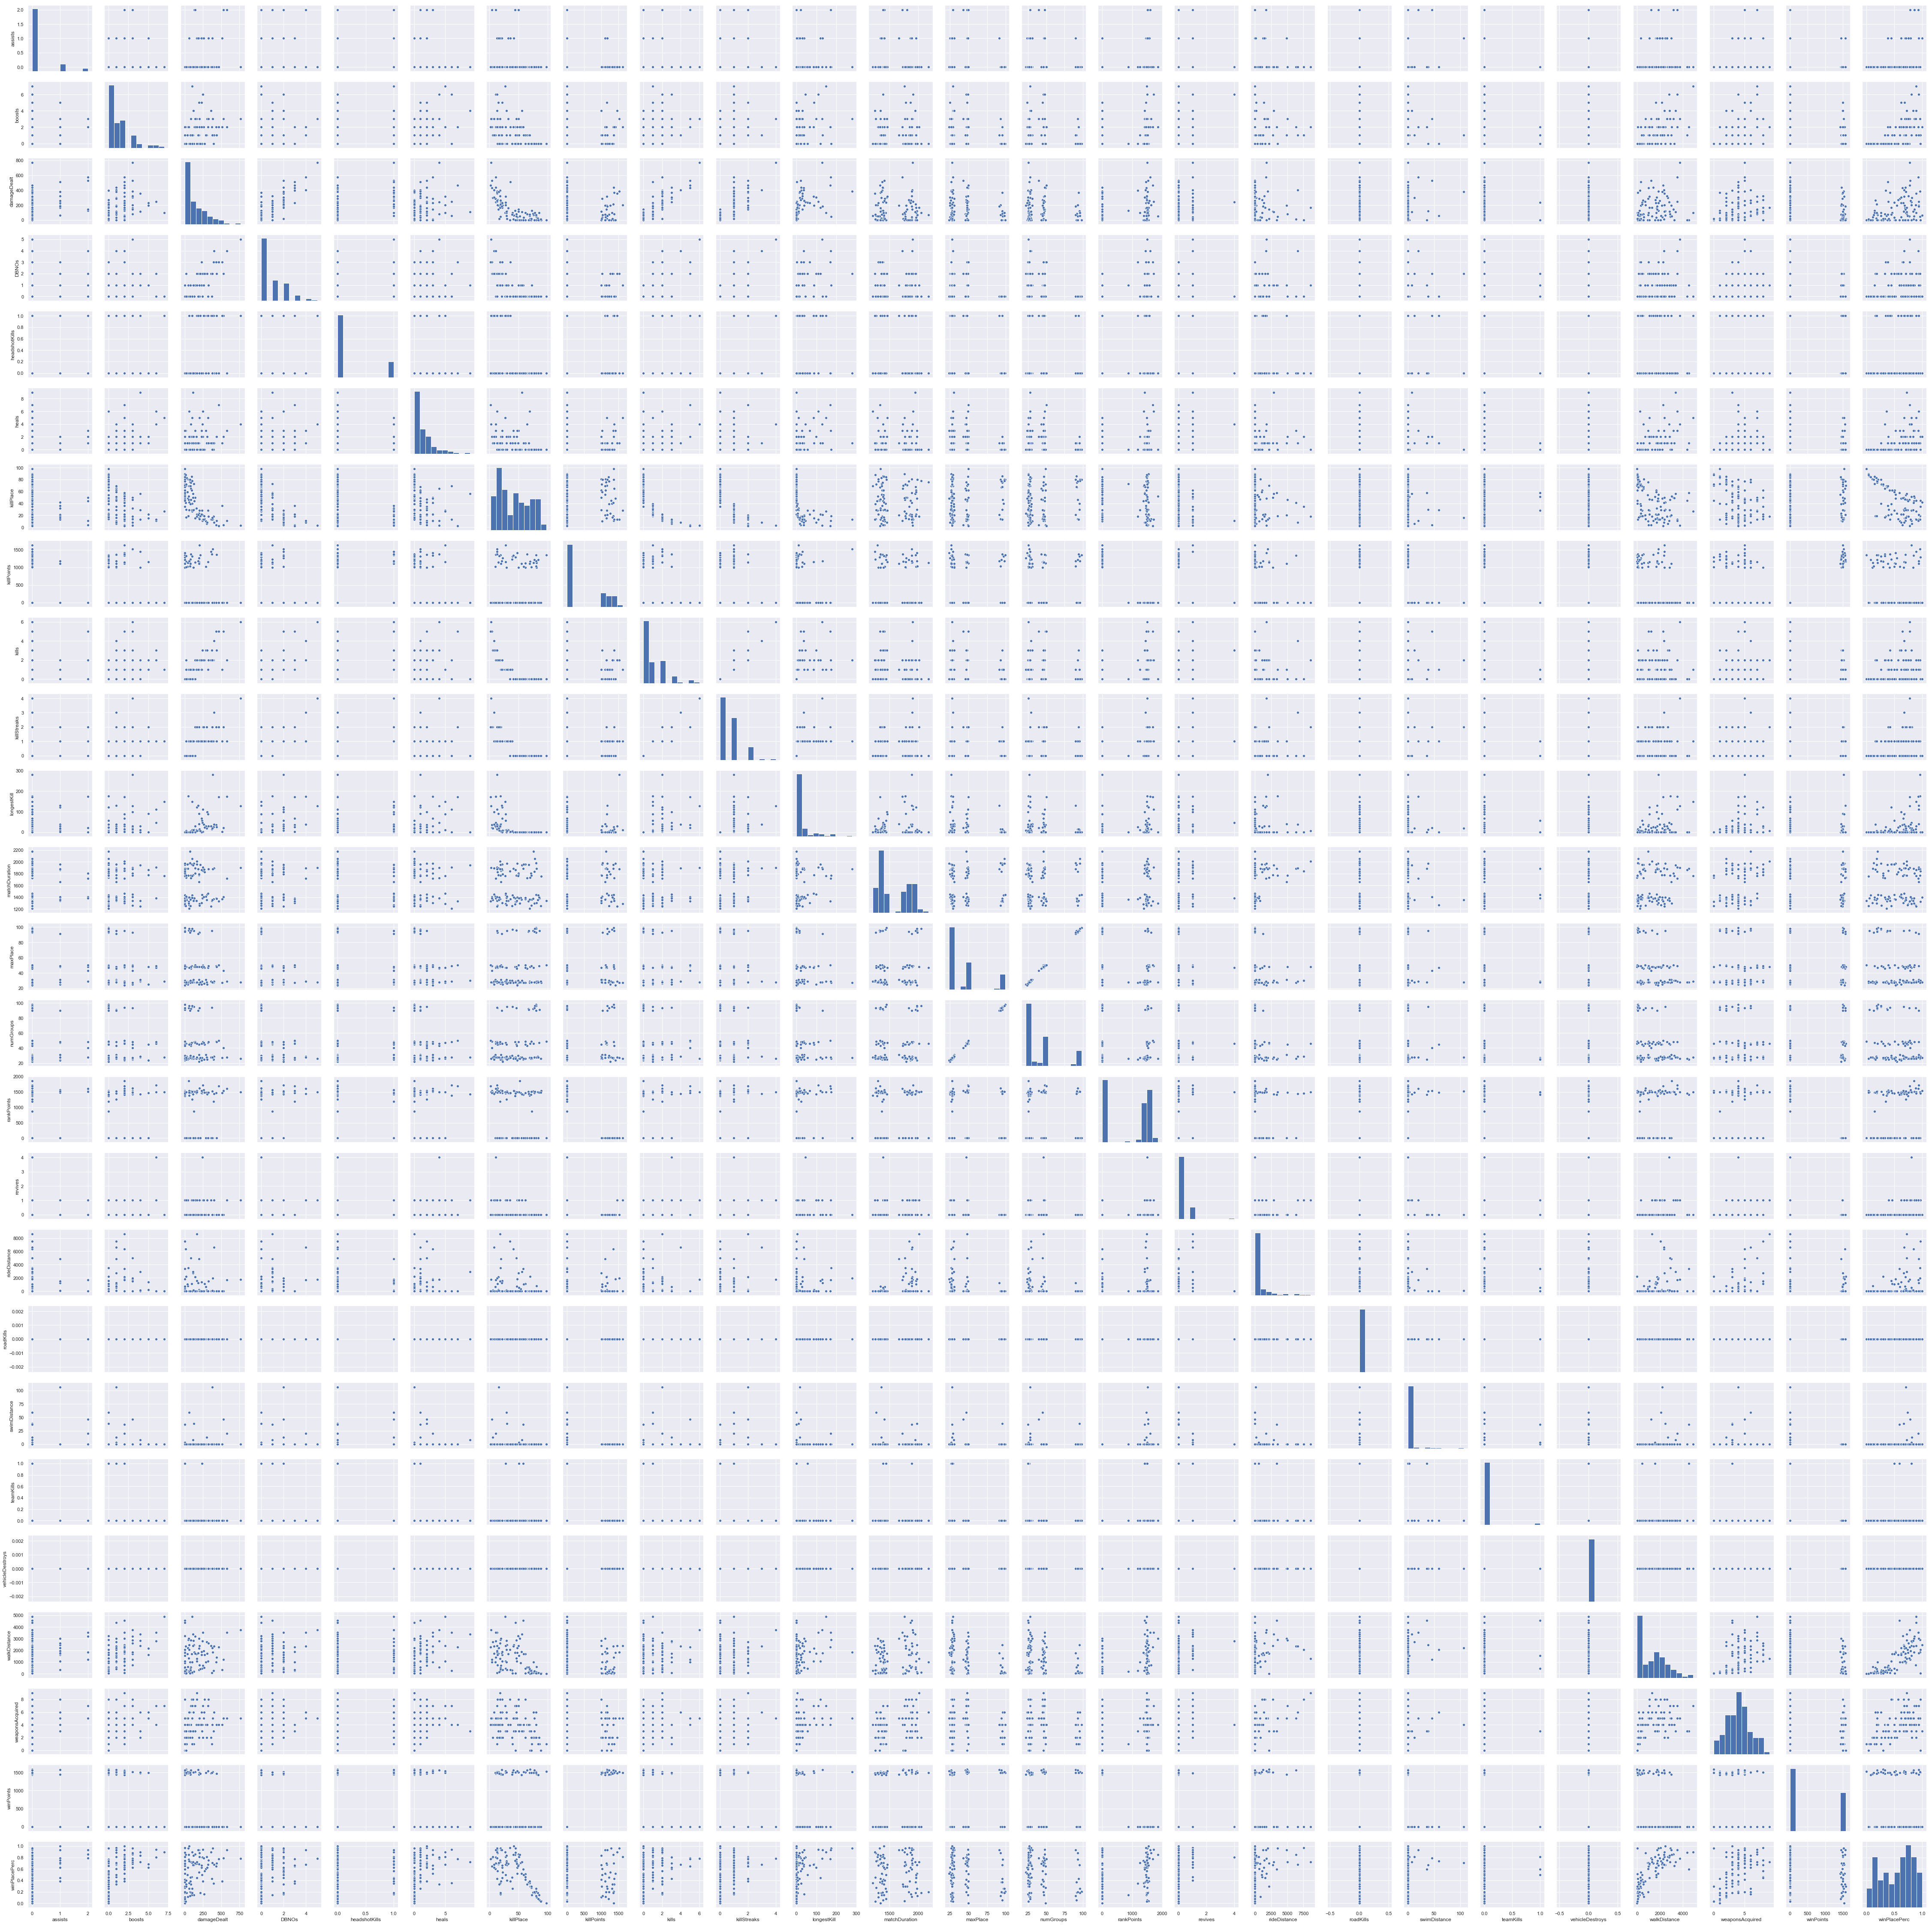

In [14]:
sns.pairplot(data.sample(100), size = 2.5) #hue="WinPlaceBucket")

In [13]:
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'WinPlaceBucket'],
      dtype=object)

### We checked the correlation matrix above
### Using scatter plot for the variables correlated with Winning Percentage to find if there is any linear relationship
### Note: Correlation is not causation

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


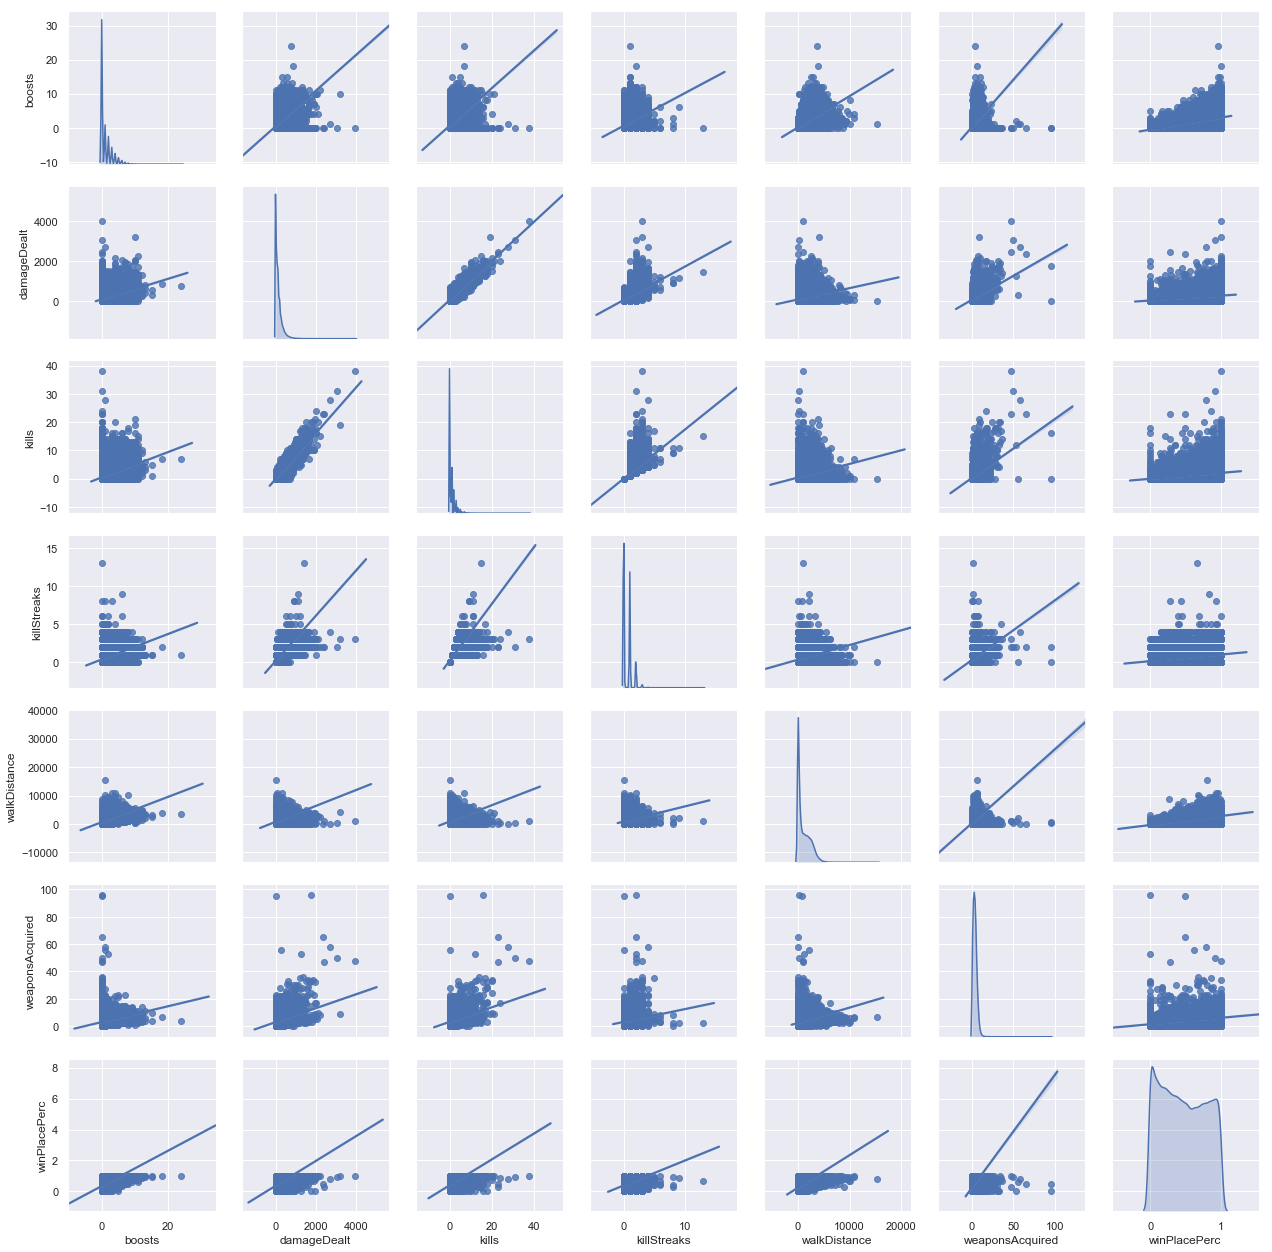

In [14]:
col=["boosts", "damageDealt", "kills", "killStreaks", "walkDistance", "weaponsAcquired","winPlacePerc"]
sns.pairplot(data[col].sample(100000), size = 2.5, kind="reg", diag_kind="kde")

### Check Counts of the palyers belonging to each quartile

![flat 550x550 075 f](https://user-images.githubusercontent.com/13174586/48707380-462b7b80-ec25-11e8-96f0-41083b3d7319.jpg)

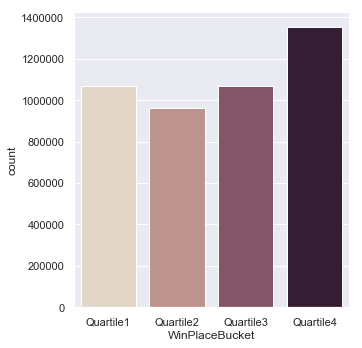

In [16]:
sns.catplot(x="WinPlaceBucket", kind="count", palette="ch:.25", data=data.sort_values("WinPlaceBucket"))

### Check the relationship between WalkDistance, SwimDistance, and RideDistance with Kills based on WinPlace Quartile
![download](https://user-images.githubusercontent.com/13174586/48707564-e5e90980-ec25-11e8-82e3-e3d36c85cbf0.jpg)
![download 1](https://user-images.githubusercontent.com/13174586/48707565-e5e90980-ec25-11e8-8135-ee1bf7e994c0.jpg)
![images](https://user-images.githubusercontent.com/13174586/48707568-e681a000-ec25-11e8-8a35-ed3db2a3816e.jpg)
![images 1](https://user-images.githubusercontent.com/13174586/48707563-e5507300-ec25-11e8-824e-c439f89f482e.jpg)


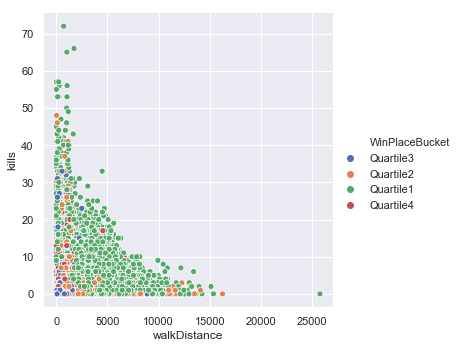

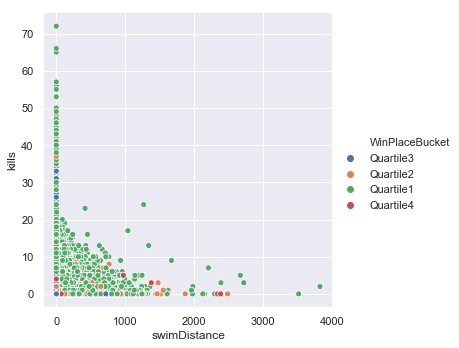

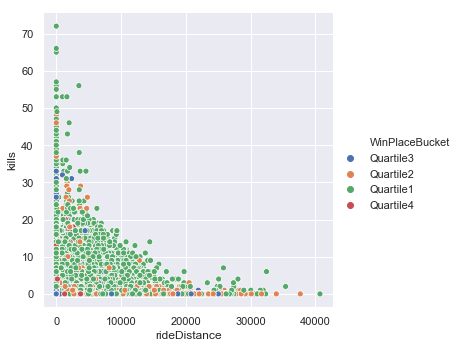

In [17]:
sns.relplot(x="walkDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="swimDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="kills", hue="WinPlaceBucket", data=data)

#### Plot1: Mostly the top Quartile players prefer camping and kill. They may travel only to move to the safe zone
#### Plot2: Most of the players avoid swimming as it makes them the most vulnerable to attacks
#### Plot3:  Similar to plot 1, the players avoid riding to much as they get easily exposed to enemy fires and even their vecicles can explode. They prefer to travel only when they are far away from the safe zone after being deployed or if they are far away from the safe zone and it starts shrinking


### Check the relationship between WalkDistance, and RideDistance with Weapons Acquired based on WinPlace Quartile

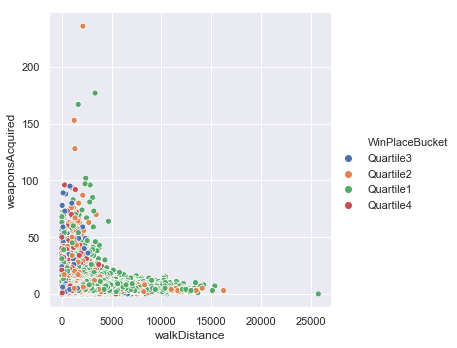

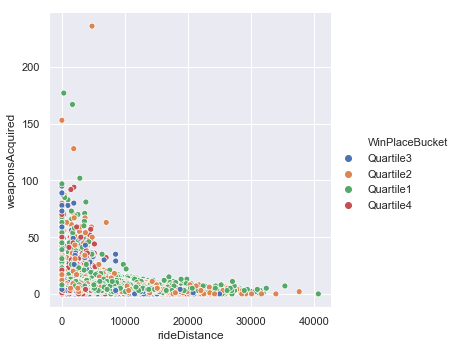

In [18]:
sns.relplot(x="walkDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

#### Generally Top Quartile Players does not focus much on scavenging too weapons and attachments. They require basic components like, good automatic guns, scopes, grenades, smoke. They mostly travel for changing camping locations and move to safe zones. It's all skills that matter

### Check the relationship between DBNOs with Weapons Acquired based on WinPlace Quartile and kills with WinPlace Quartile

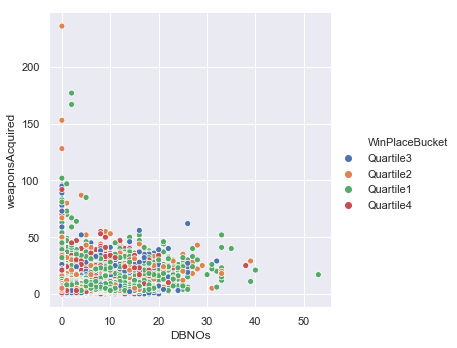

In [19]:
sns.relplot(x="DBNOs", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

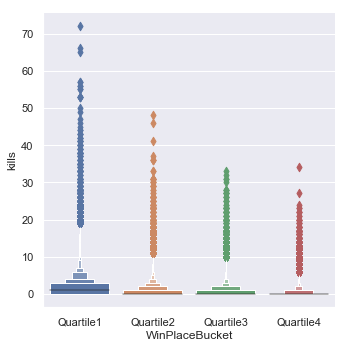

In [20]:
sns.catplot(x="WinPlaceBucket", y="kills", kind="boxen",
            data=data.sort_values("WinPlaceBucket"))

In [21]:
#data.columns.values
data["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

### Create bucket for Kills:
![unsunggrizzledhornedviper-size_restricted](https://user-images.githubusercontent.com/13174586/48753002-0bbbf000-ecb2-11e8-9194-05b64565682d.gif)
#### Kill: 0
#### Kill: 1
#### Kills: 2
#### Kills: 3 to 5
#### Kills: 6 to 10
#### Kills: 10+

In [43]:
data['KillsBucket'] = np.where(data.kills >10, 'Kills:10+', 
                          np.where(data.kills>5, 'Kills:6 to 10', 
                                   np.where(data.kills>=3, 'Kills:3 to 5', 
                                            np.where(data.kills==2, 'Kills:2', 
                                                     np.where(data.kills==1, 'Kill:1', 'Kill:0')))))

,kills,KillsBucket
0,0,Kill:0
1,0,Kill:0
2,0,Kill:0
3,0,Kill:0
4,1,Kill:1
5,1,Kill:1
6,0,Kill:0
7,0,Kill:0
8,0,Kill:0
9,0,Kill:0


In [44]:
data["KillsBucket"].value_counts()

Kill:0           2529722
Kill:1            928079
Kills:2           472466
Kills:3 to 5      423561
Kills:6 to 10      84798
Kills:10+           8340
Name: KillsBucket, dtype: int64

#### The players with 10+ Kilss are Pro they most of the time finish with Win Place Percentage of almost 100%. Similarly players with 6 to 10 Kills gives good fight and also mostly end up in the to quartile with median win place as asound 92%. Players with 0 or 1 kills are the one who mostly fight to survive. These are the kind of players who avoids gunfights and keeps of hiding until they are spotted by enemies or end up in  a very small safe zone  

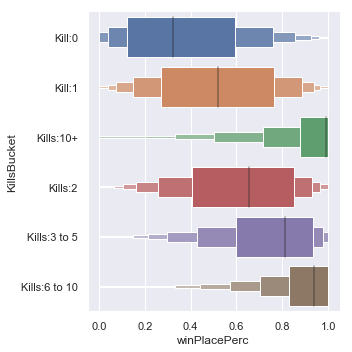

In [46]:
sns.catplot(x="winPlacePerc", y="KillsBucket", kind="boxen",
            data=data.sort_values("KillsBucket"))

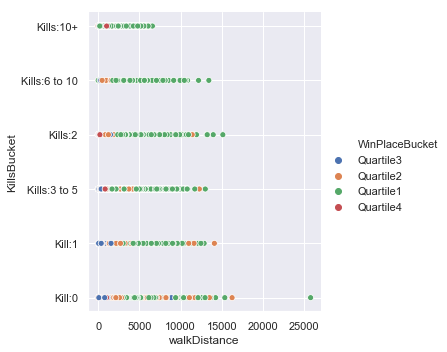

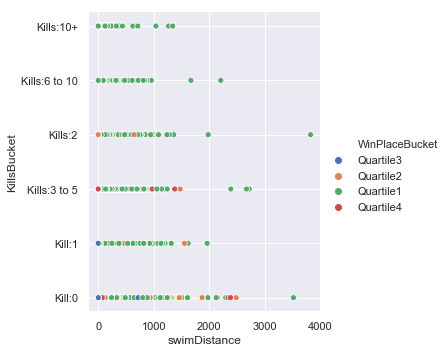

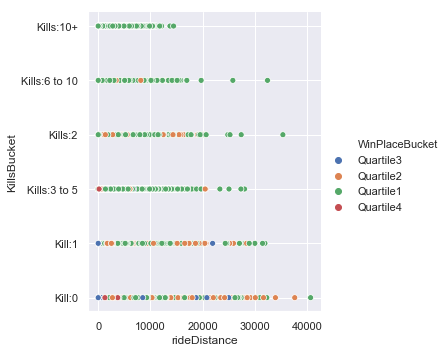

In [54]:
sns.relplot(x="walkDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)
sns.relplot(x="swimDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)

### Relation between Heals and Boosts
![maxresdefault](https://user-images.githubusercontent.com/13174586/48753435-f5af2f00-ecb3-11e8-9c7b-45cd1a9ff9e6.jpg)
#### Heals
![download 2](https://user-images.githubusercontent.com/13174586/48753424-ecbe5d80-ecb3-11e8-80f7-1c24b712d60b.jpg)
#### Boosts
![download 3](https://user-images.githubusercontent.com/13174586/48753452-0c558600-ecb4-11e8-8af4-ff2c1811a522.jpg)
#### Boosts are always required for inflicting more damage to opponents and run faster. It mostly helps in attacking
#### Heals are required to treat the palyer himself when dealt with wounds or too much damage. We can see drop in win percentage with high boost usage. This typically happens when palyers enter in combat or being spotted while entering safe zone 

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Win Place %')

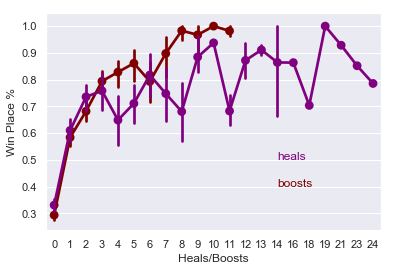

In [143]:
random.seed(120)
sns.pointplot(x="boosts", y="winPlacePerc", data=data.sample(1000), color="maroon")
sns.pointplot(x="heals", y="winPlacePerc", data=data.sample(1000), color="purple")
plt.text(14,0.5,"heals", color="purple")
plt.text(14,0.4,"boosts", color="maroon")
plt.xlabel("Heals/Boosts")
plt.ylabel("Win Place %")

### SOLO v DUO v SQUAD
![download 4](https://user-images.githubusercontent.com/13174586/48754523-f053e380-ecb7-11e8-9004-c18abe13794f.jpg)
![download 5](https://user-images.githubusercontent.com/13174586/48754525-f21da700-ecb7-11e8-8155-6b348b613d49.jpg)
![download 6](https://user-images.githubusercontent.com/13174586/48754526-f3e76a80-ecb7-11e8-8104-c5edd52f5ec9.jpg)


In [158]:
data['GroupBucket'] = np.where(data.numGroups >50, 'Solo', 
                          np.where(data.numGroups>25 , 'Duo', 'Squad'))
data["GroupBucket"].value_counts()

Duo      3295326
Solo      709111
Squad     442529
Name: GroupBucket, dtype: int64

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


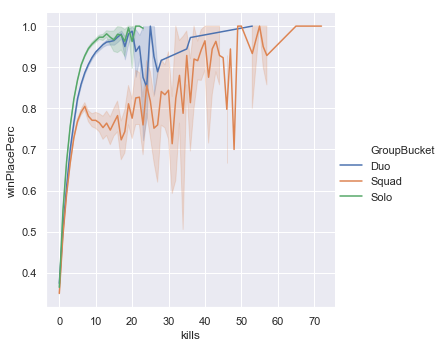

In [169]:
sns.relplot(x="kills", y="winPlacePerc", hue="GroupBucket", kind="line", data=data)

### Relation between Vehicle Destroys, Kills and Win Place
![images 2](https://user-images.githubusercontent.com/13174586/48754611-4aed3f80-ecb8-11e8-9499-3b782106f5f6.jpg)

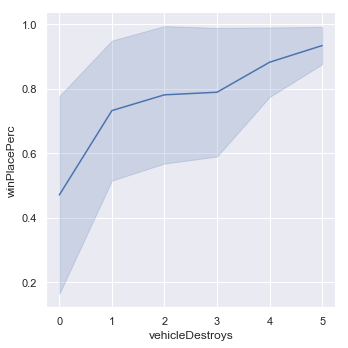

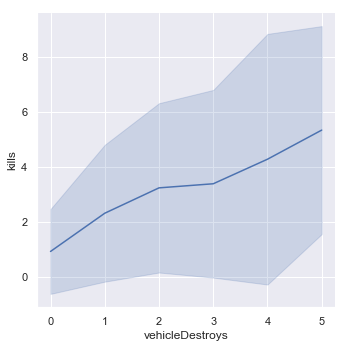

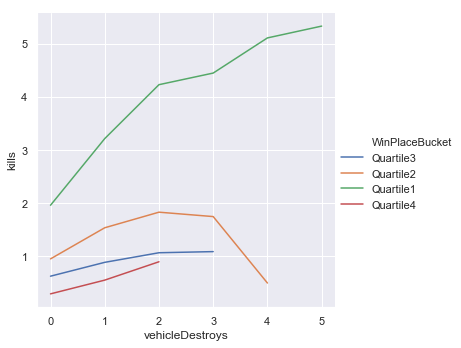

In [184]:
sns.relplot(x="vehicleDestroys", y="winPlacePerc", kind="line",ci="sd", data=data)
sns.relplot(x="vehicleDestroys", y="kills", kind="line",ci="sd", data=data)
sns.relplot(x="vehicleDestroys", y="kills", kind="line",ci=None, hue="WinPlaceBucket", data=data)

In [18]:
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'], dtype=object)

In [28]:
data_v2= data.drop(data[["matchDuration", "matchType", "maxPlace", "rankPoints"]], axis=1)

In [29]:
data_v2.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'numGroups', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'], dtype=object)

In [30]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 22 columns):
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(16)
memory usage: 746.4 MB


## Building Predictive Models

### Regression

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as split

In [39]:
train, test= split(data_v2, test_size=0.2, random_state=123)

In [90]:
train_y= train["winPlacePerc"].copy()
test_y= test["winPlacePerc"].copy()

In [91]:
train_x=train.drop(train[["winPlacePerc"]],axis=1)
test_x=test.drop(test[["winPlacePerc"]],axis=1)

#### Check for NAN

In [93]:
print("train_x: ", np.isnan(train_x).any())
print("train_y: ",np.isnan(train_y).any())
print("test_x: ",np.isnan(test_x).any())
print("test_y: ",np.isnan(test_y).any())

train_x:  assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
numGroups          False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
dtype: bool
train_y:  False
test_x:  assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
numGroups          False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
veh

#### Missing Values in: 
### test_Y
#### Will impute with mean

In [95]:
test_y=test_y.fillna(test_y.mean())

In [96]:
#Check again
print("test_y: ",np.isnan(test_y).any())

test_y:  False


#### Create Regression model object

In [97]:
reg= linear_model.LinearRegression()

In [98]:
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
#Predicting the test set
test_y_pred= reg.predict(test_x)

#### Print Regression Coefficients

In [100]:
list(zip(train.columns.values,reg.coef_))

[('assists', 0.01884895129189042),
 ('boosts', 0.016829232221707218),
 ('damageDealt', 4.396882404647211e-05),
 ('DBNOs', -0.00494067215486172),
 ('headshotKills', 0.002102462434100838),
 ('heals', 0.00021349917095044247),
 ('killPlace', -0.007277536709771795),
 ('killPoints', -7.5004460477807866e-06),
 ('kills', -0.012736237558475857),
 ('killStreaks', -0.13725845690574273),
 ('longestKill', -2.525021633779101e-05),
 ('numGroups', 0.001132147267815179),
 ('revives', 0.014523086682707005),
 ('rideDistance', 7.858860476538877e-06),
 ('roadKills', 0.021416646734751268),
 ('swimDistance', 0.0001333776696890053),
 ('teamKills', -0.021543650611426313),
 ('vehicleDestroys', 0.0009823421731235825),
 ('walkDistance', 0.00011020060577130245),
 ('weaponsAcquired', 0.010124123715639848),
 ('winPoints', 1.1415337012606053e-05)]

#### Mean Squared Error

In [101]:
mse= mean_squared_error(test_y_pred,test_y)
print("Mean Squared Error: ",mse)

Mean Squared Error:  0.017780008723652405


#### Explained Variance- R-Squared

In [110]:
r2_score(test_y_pred,test_y)

0.7682427442744932

In [111]:
test_actual= pd.read_csv("test_V2.csv")

In [112]:
test_actual.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [117]:
test_model= test_actual.drop(test_actual[["Id", "groupId", "matchId", "matchDuration", "matchType", "maxPlace", "rankPoints"]], axis=1)

In [118]:
test_model_predict= reg.predict(test_model)

In [119]:
test_model_predict

array([0.23419071, 0.88223238, 0.47857908, ..., 0.74529198, 0.70205458,
       0.07708274])

In [120]:
op= pd.DataFrame(list(zip(test_actual["Id"], test_model_predict)))

In [124]:
op= op.rename(columns={0: 'Id', 1: 'winPlacePerc'})

In [127]:
op.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.234191
1,639bd0dcd7bda8,0.882232
2,63d5c8ef8dfe91,0.478579
3,cf5b81422591d1,0.546330
4,ee6a295187ba21,0.922065


In [126]:
op.to_csv("op_LinReg.csv", encoding='utf-8', index=False)